# 데이터 전처리하기
* 팀원 : 성수린
* 맡은 데이터 : 점포_상권 / 점포_행정동
* 추가로 가져온 데이터 : 영역_상권

## 과정
1. 데이터을 DataFrame에 넣어 확인하기
2. .info()를 이용해 결측치 확인
3. .head()를 이용해 DF의 값 확인
    * column 간의 관계 확인 
    * 사용하지 않을 column 제거
    * 추가할 column 넣기
4. 세분화된 데이터 확인
    * 그룹으로 묶어서 확인하고 싶은 것은 묶어주기(boxplot을 이용해 기준을 잡아줌.)
5. column간의 관계 확인하기
    * .groupby 이용해서 확인
    * 간단한 그래프 그려보기
    * 관계 확인하며 나중에 어떤 식으로 분석을 해야할지 확인하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# path 가져오기

In [2]:
path1 = '../csv/new점포-상권.csv'
path2 = '../csv/new점포-행정동.csv'
path3 = '../csv/강남구(영역-상권).csv'

# 점포-상권.csv 확인

In [3]:
# 점포-상권
temp1 = pd.read_csv(path1, encoding='cp949')

In [4]:
print(temp1.shape)
temp1.info()

(3113, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3113 non-null   int64 
 1   상권_구분_코드     3113 non-null   object
 2   상권_구분_코드_명   3113 non-null   object
 3   상권_코드        3113 non-null   int64 
 4   상권_코드_명      3113 non-null   object
 5   서비스_업종_코드    3113 non-null   object
 6   서비스_업종_코드_명  3113 non-null   object
 7   점포_수         3113 non-null   int64 
 8   유사_업종_점포_수   3113 non-null   int64 
 9   개업_율         3113 non-null   int64 
 10  개업_점포_수      3113 non-null   int64 
 11  폐업_률         3113 non-null   int64 
 12  폐업_점포_수      3113 non-null   int64 
 13  프랜차이즈_점포_수   3113 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 340.6+ KB


In [5]:
# 중앙값, 평균 등 수치 평균 확인
temp1.describe()

,기준_년분기_코드,상권_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,20232.502409,3.115645e+06,13.329586,15.869258,3.857372,0.635400,3.840026,0.618696,2.539672
std,1.118929,1.362236e+04,28.084441,31.520782,11.260908,1.598037,10.752658,1.473239,5.260787
min,20231.000000,3.001496e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20232.000000,3.110980e+06,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20233.000000,3.120191e+06,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20234.000000,3.120210e+06,12.000000,15.000000,3.000000,1.000000,3.000000,1.000000,3.000000
max,20234.000000,3.130310e+06,363.000000,403.000000,100.000000,23.000000,100.000000,23.000000,49.000000


In [6]:
temp1.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [7]:
temp1.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,2,1,4,2,10
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,0,18,2,1
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,0,0,6


In [8]:
# 이상치라고 봐도 될까?
# 왜냐면 유사업종점포수는 점포수 + 프랜차이즈점포수 이기 때문에!
# 폐업점포수가 있으면 전분기에 점포가 있었나 알아봐야할 것 같음.
# 개업점포수가 있다면 다음 분기에 그 점포가 있나 봐야할 것 같음.
print(temp1[temp1['유사_업종_점포_수'] == 0].shape)
temp1.query('유사_업종_점포_수 == 0')

(18, 14)


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
98,20231,A,골목상권,3110962,도산공원북측,CS100009,호프-간이주점,0,0,0,0,0,1,0
113,20231,A,골목상권,3110965,언주역 6번,CS100005,제과점,0,0,0,0,0,1,0
257,20231,A,골목상권,3110990,청담역 12번,CS100001,한식음식점,0,0,0,0,0,1,0
648,20231,D,발달상권,3120216,경기고교사거리(경기고교앞사거리),CS100009,호프-간이주점,0,0,0,0,0,1,0
791,20232,A,골목상권,3110949,한남IC,CS100006,패스트푸드점,0,0,0,0,0,1,0
924,20232,A,골목상권,3110971,선정릉역 4번,CS100002,중식음식점,0,0,0,0,0,1,0
942,20232,A,골목상권,3110974,언주중학교,CS100001,한식음식점,0,0,0,0,0,1,0
958,20232,A,골목상권,3110978,도곡2동주민센터(대치중학교),CS100001,한식음식점,0,0,0,0,0,1,0
1512,20232,R,전통시장,3130303,영동전통시장,CS100005,제과점,0,0,0,0,0,1,0
1569,20233,A,골목상권,3110949,한남IC,CS100009,호프-간이주점,0,0,0,0,0,1,0


# 점포-상권-행정동 묶기

In [9]:
# 강남구-행정동 데이터
temp3 = pd.read_csv(path3, encoding='cp949')

In [10]:
temp3 = temp3.drop('행정동', axis=1)
temp3.head(3)

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명
0,A,골목상권,3110968,강남구청역 2번,11680,강남구,11680531,논현2동
1,A,골목상권,3110969,베르사이유1아파트,11680,강남구,11680650,역삼2동
2,A,골목상권,3110970,학동초등학교,11680,강남구,11680531,논현2동


In [11]:
# 복사해서 사용하기
gangnam = temp3.copy()
gangnam.head(3)

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명
0,A,골목상권,3110968,강남구청역 2번,11680,강남구,11680531,논현2동
1,A,골목상권,3110969,베르사이유1아파트,11680,강남구,11680650,역삼2동
2,A,골목상권,3110970,학동초등학교,11680,강남구,11680531,논현2동


In [12]:
# 필요한 컬럼 제외 후 삭제
# 상권_코드, 상권_코드_명, 행정동_코드, 행정동_코드_명
columns = ['상권_코드_명', '행정동_코드', '행정동_코드_명']

gangnam = gangnam[columns]
gangnam.head(3)

,상권_코드_명,행정동_코드,행정동_코드_명
0,강남구청역 2번,11680531,논현2동
1,베르사이유1아파트,11680650,역삼2동
2,학동초등학교,11680531,논현2동


In [13]:
# 점포_상권에 행정동 넣기
gangnam_jp = pd.merge(temp1, gangnam, left_on='상권_코드_명', right_on='상권_코드_명', how='left')
gangnam_jp.head(3) # 이렇게 되면 점포-상권 / 행정동 전부 확인 가능함.

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,2,1,4,2,10,11680580,삼성1동
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,0,18,2,1,11680580,삼성1동
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,0,0,6,11680580,삼성1동


In [14]:
gangnam_jp.info() # 결측치는 없음을 확인함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    3113 non-null   int64 
 1   상권_구분_코드     3113 non-null   object
 2   상권_구분_코드_명   3113 non-null   object
 3   상권_코드        3113 non-null   int64 
 4   상권_코드_명      3113 non-null   object
 5   서비스_업종_코드    3113 non-null   object
 6   서비스_업종_코드_명  3113 non-null   object
 7   점포_수         3113 non-null   int64 
 8   유사_업종_점포_수   3113 non-null   int64 
 9   개업_율         3113 non-null   int64 
 10  개업_점포_수      3113 non-null   int64 
 11  폐업_률         3113 non-null   int64 
 12  폐업_점포_수      3113 non-null   int64 
 13  프랜차이즈_점포_수   3113 non-null   int64 
 14  행정동_코드       3113 non-null   int64 
 15  행정동_코드_명     3113 non-null   object
dtypes: int64(10), object(6)
memory usage: 389.3+ KB


In [15]:
gangnam_jp.describe()

,기준_년분기_코드,상권_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드
count,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3.113000e+03
mean,20232.502409,3.115645e+06,13.329586,15.869258,3.857372,0.635400,3.840026,0.618696,2.539672,1.168060e+07
std,1.118929,1.362236e+04,28.084441,31.520782,11.260908,1.598037,10.752658,1.473239,5.260787,5.998467e+01
min,20231.000000,3.001496e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.168051e+07
25%,20232.000000,3.110980e+06,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.168054e+07
50%,20233.000000,3.120191e+06,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.168059e+07
75%,20234.000000,3.120210e+06,12.000000,15.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.168064e+07
max,20234.000000,3.130310e+06,363.000000,403.000000,100.000000,23.000000,100.000000,23.000000,49.000000,1.168075e+07


In [16]:
# 개업율, 폐업률 삭제하기 전에 복사본 만들어두기
gangnam_점포_상권_행정동 = gangnam_jp.copy()
gangnam_점포_상권_행정동.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,2,1,4,2,10,11680580,삼성1동
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,0,18,2,1,11680580,삼성1동
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,0,0,6,11680580,삼성1동


In [17]:
# 개업율, 폐업률 삭제
gangnam_점포_상권_행정동 = gangnam_점포_상권_행정동.drop(['개업_율', '폐업_률'], axis=1)
gangnam_점포_상권_행정동.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,1,2,10,11680580,삼성1동
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,2,1,11680580,삼성1동
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,6,11680580,삼성1동


# 점포-행정동.csv 확인

In [18]:
# 점포_행정동.csv
temp2 = pd.read_csv(path2, encoding='cp949')
temp2.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,3,9,3,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,3,4,4,10


In [19]:
print(temp2.shape)
temp2.info()

(588, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년분기_코드    588 non-null    int64 
 1   행정동_코드       588 non-null    int64 
 2   행정동_코드_명     588 non-null    object
 3   서비스_업종_코드    588 non-null    object
 4   서비스_업종_코드_명  588 non-null    object
 5   점포_수         588 non-null    int64 
 6   유사_업종_점포_수   588 non-null    int64 
 7   개업_율         588 non-null    int64 
 8   개업_점포_수      588 non-null    int64 
 9   폐업_률         588 non-null    int64 
 10  폐업_점포_수      588 non-null    int64 
 11  프랜차이즈_점포_수   588 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 55.3+ KB


In [20]:
temp2.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '점포_수',
       '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [21]:
temp2.describe()

,기준_년분기_코드,행정동_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,20232.000000,1.168062e+07,59.205782,70.622449,3.884354,2.819728,3.789116,2.797619,11.416667
std,0.817192,6.741414e+01,105.072086,116.954251,4.749991,5.054876,4.845457,5.024118,16.628464
min,20231.000000,1.168051e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20231.000000,1.168056e+07,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,20232.000000,1.168063e+07,23.000000,32.000000,3.000000,1.000000,3.000000,1.000000,7.000000
75%,20233.000000,1.168067e+07,67.500000,76.250000,6.000000,3.000000,6.000000,3.000000,13.000000
max,20233.000000,1.168075e+07,1026.000000,1140.000000,33.000000,47.000000,67.000000,53.000000,131.000000


# 점포-행정동.csv와 gangnam_점포 비교하기
* 값이 맞는지 확인 (대신 원래 점포_행정동.csv에 기준년분기코드가 20231 ~ 20233이기 때문에 이거는 주의해야 함.)

In [22]:
# 행정동별 점포수 in temp2
temp2.groupby('행정동_코드_명')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
행정동_코드_명,,,
개포1동,33,6,39
개포2동,330,136,466
개포4동,574,132,706
논현1동,2607,403,3010
논현2동,3255,506,3761
대치1동,336,135,471
대치2동,1446,362,1808
대치4동,1995,547,2542
도곡1동,684,137,821


In [23]:
# 연도별 점포수 in temp2
temp2.groupby('기준_년분기_코드')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
기준_년분기_코드,,,
20231,11545,2256,13801
20232,11648,2246,13894
20233,11620,2211,13831


In [24]:
# 연도별 점포수 in gangnam_점포
gangnam_점포_상권_행정동.groupby('기준_년분기_코드')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
기준_년분기_코드,,,
20231,10291,1998,12289
20232,10383,1987,12370
20233,10370,1968,12338
20234,10451,1953,12404


In [25]:
# 행정동별 점포수 in gangnam_점포
gangnam_점포_상권_행정동.query('기준_년분기_코드 != 20234').groupby('행정동_코드_명')[['점포_수', '프랜차이즈_점포_수', '유사_업종_점포_수']].sum()

,점포_수,프랜차이즈_점포_수,유사_업종_점포_수
행정동_코드_명,,,
개포2동,267,118,385
개포4동,302,37,339
논현1동,3852,677,4529
논현2동,2304,348,2652
대치1동,224,63,287
대치2동,920,282,1202
대치4동,2978,791,3769
도곡1동,129,3,132
도곡2동,517,85,602


In [26]:
# gangnam DF에 개포 1동이 있는지 확인
gangnam.query('행정동_코드_명 == "개포1동"')

,상권_코드_명,행정동_코드,행정동_코드_명
17,개포지하차도 북측,11680660,개포1동


In [27]:
# temp1에 개포지하차도 북측 있는지 확인
temp1.query('상권_코드_명 == "개포지하차도 북측"')

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수


In [28]:
# temp2에서 개포1동 찾기
temp2.query('행정동_코드_명 == "개포1동"')
## 개포1동은 따로 봐야 함. 점포-상권(temp1 DF)에 개포1동에 대한 상권 정보가 없음.
## 개포1동 따로 저장..? 결과가 동별 추천이기 때문에 동별 대표 상권을 뽑고 생각해도 될 듯 함.
# 개포1동은 점포수의 변화가 없음.

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
140,20231,11680660,개포1동,CS100001,한식음식점,4,5,0,0,0,0,1
141,20231,11680660,개포1동,CS100002,중식음식점,1,1,0,0,0,0,0
142,20231,11680660,개포1동,CS100006,패스트푸드점,1,1,0,0,0,0,0
143,20231,11680660,개포1동,CS100007,치킨전문점,0,1,0,0,0,0,1
144,20231,11680660,개포1동,CS100008,분식전문점,2,2,0,0,0,0,0
145,20231,11680660,개포1동,CS100010,커피-음료,3,3,0,0,0,0,0
336,20232,11680660,개포1동,CS100001,한식음식점,4,5,0,0,0,0,1
337,20232,11680660,개포1동,CS100002,중식음식점,1,1,0,0,0,0,0
338,20232,11680660,개포1동,CS100006,패스트푸드점,1,1,0,0,0,0,0
339,20232,11680660,개포1동,CS100007,치킨전문점,0,1,0,0,0,0,1


In [29]:
## gangnam_점포.csv와 temp2 비교 했을 때 둘 다 살펴봐야 하는 걸 확인함.

In [30]:
# 점포_행정동 DF 복사해서 쓰기
gangnam_점포_행정동 = temp2.copy()
gangnam_점포_행정동.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,3,9,3,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,3,4,4,10


In [31]:
# 개업율, 폐업률 삭제하기
gangnam_점포_행정동 = gangnam_점포_행정동.drop(['개업_율', '폐업_률'], axis=1)
gangnam_점포_행정동.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,20231,11680510,신사동,CS100001,한식음식점,287,313,9,10,26
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,1
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,4,10


# 행정동 합치기
* gangnam_점포_행정동, gangnam_점포_상권_행정동 둘다 적용해야함.

## gangnam_점포_행정동

In [32]:
# 행정동_코드_명의 unique() 확인하기
print(gangnam_점포_행정동['행정동_코드_명'].unique())
gangnam_점포_행정동['행정동_코드_명'].nunique()

['신사동' '논현1동' '논현2동' '압구정동' '청담동' '삼성1동' '삼성2동' '대치1동' '대치2동' '대치4동'
 '역삼1동' '역삼2동' '도곡1동' '도곡2동' '개포1동' '개포2동' '개포4동' '세곡동' '일원1동' '수서동']


20

## gangnam_점포_상권_행정동

In [33]:
# 행정동_코드_명의 unique() 확인
print(gangnam_점포_상권_행정동['행정동_코드_명'].unique())
gangnam_점포_상권_행정동['행정동_코드_명'].nunique()

['삼성1동' '신사동' '논현1동' '역삼1동' '논현2동' '압구정동' '도곡1동' '역삼2동' '청담동' '삼성2동'
 '개포4동' '도곡2동' '대치4동' '개포2동' '대치2동' '일원1동' '세곡동' '대치1동' '수서동']


19

## 행정동 합치기 위한 데이터프레임 만들기

In [34]:
add_행정동 = pd.DataFrame(
                            {'행정동_코드_명' : ['신사동', '논현1동', '논현2동', '압구정동', '청담동', '삼성1동', '삼성2동', '대치1동', '대치2동', '대치4동', '역삼1동', '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포2동', '개포4동', '세곡동', '일원1동', '수서동'],
                             '통합_행정동_명' : ['신사동', '논현동', '논현동', '압구정동', '청담동', '삼성동', '삼성동', '대치동', '대치동', '대치동', '역삼동', '역삼동', '도곡동', '도곡동', '개포동', '개포동', '개포동', '세곡동', '일원1동', '수서동']}
                         )
add_행정동.head(3)

,행정동_코드_명,통합_행정동_명
0,신사동,신사동
1,논현1동,논현동
2,논현2동,논현동


## merge() 합치기

In [35]:
# 점포_행정동.csv
gangnam_점포_행정동 = pd.merge(gangnam_점포_행정동, add_행정동, left_on='행정동_코드_명', right_on='행정동_코드_명', how='left')
gangnam_점포_행정동.head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,통합_행정동_명
0,20231,11680510,신사동,CS100001,한식음식점,287,313,9,10,26,신사동
1,20231,11680510,신사동,CS100002,중식음식점,26,27,0,0,1,신사동
2,20231,11680510,신사동,CS100003,일식음식점,87,97,3,4,10,신사동


In [36]:
# 점포_상권_행정동
gangnam_점포_상권_행정동 = pd.merge(gangnam_점포_상권_행정동, add_행정동, left_on='행정동_코드_명', right_on='행정동_코드_명', how='left')
gangnam_점포_상권_행정동.head(3)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명,통합_행정동_명
0,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100001,한식음식점,45,55,1,2,10,11680580,삼성1동,삼성동
1,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100002,중식음식점,10,11,0,2,1,11680580,삼성1동,삼성동
2,20231,U,관광특구,3001496,강남 마이스 관광특구,CS100003,일식음식점,18,24,0,0,6,11680580,삼성1동,삼성동


# 행정동별 상권 특징 파악하기
* 점포_상권_행정동 사용해서 행정동별 상권코드명 비교

In [37]:
gangnam_점포_상권_행정동[['상권_코드_명', '통합_행정동_명']]

,상권_코드_명,통합_행정동_명
0,강남 마이스 관광특구,삼성동
1,강남 마이스 관광특구,삼성동
2,강남 마이스 관광특구,삼성동
3,강남 마이스 관광특구,삼성동
4,강남 마이스 관광특구,삼성동
...,...,...
3108,강남개포시장,개포동
3109,강남개포시장,개포동
3110,강남개포시장,개포동
3111,강남개포시장,개포동


In [38]:
# 행정동별 상권 특징 DF
행정동_상권 = gangnam_점포_상권_행정동.groupby(['통합_행정동_명', '상권_코드_명'])[['상권_코드']].count().reset_index()
행정동_상권

,통합_행정동_명,상권_코드_명,상권_코드
0,개포동,강남개포시장,40
1,개포동,개포고등학교,36
2,개포동,개포지구대옆,25
3,개포동,국립국악고등학교,32
4,개포동,국악고교사거리,36
...,...,...,...
97,청담동,청담사거리(청담동명품거리),40
98,청담동,청담삼익시장,12
99,청담동,청담역 12번,16
100,청담동,청담초등학교,24


In [39]:
# 상권_코드 컬럼명 변경
행정동_상권 = 행정동_상권.rename(columns={'상권_코드':'개수'})
행정동_상권.head(3)

,통합_행정동_명,상권_코드_명,개수
0,개포동,강남개포시장,40
1,개포동,개포고등학교,36
2,개포동,개포지구대옆,25


In [40]:
행정동_상권['상권_코드_명'].unique()

array(['강남개포시장', '개포고등학교', '개포지구대옆', '국립국악고등학교', '국악고교사거리', '논현로18길',
       '포이초등학교(개포목련어린이공원)', '강남구청역', '강남구청역 2번', '논현2동주민센터', '논현목련공원',
       '논현역', '논현역 7번', '논현종합시장', '논현초등학교', '서울세관', '신논현역', '언북중학교',
       '언주역 3번', '언주역(차병원)', '영동전통시장', '학동근린공원', '학동역', '학동초등학교',
       '대치2동주민센터', '대치동아우편취급국', '대치사거리', '대치역', '도곡초등학교', '도성초등학교', '삼성역',
       '선릉역', '은마아파트', '은마종합상점가', '한티역', '휘문고교사거리', '도곡2동주민센터(대치중학교)',
       '매봉역', '매봉역 1번', '싸리고개근린공원', '은광여고', '강남 마이스 관광특구', '강남구보훈회관',
       '봉은사역', '봉은사역 4번', '삼성중앙역', '삼성중앙역 5번', '삼성중앙역 7번', '선정릉역',
       '언주중학교', '청담역 3번', '코엑스', '포스코사거리', '대왕초등학교(세곡동사거리서남측)',
       '아래방죽마을공원(율현초등학교)', '윗방죽마을공원', '은곡마을(은곡마을공원)', '한국교통안전공단 강남자동차검사소',
       '수서역', '가로수길', '강남시장(강남구 강남시장)', '신사은행나무공원', '압구정역', '한남IC',
       '강남을지병원', '도산공원교차로', '도산공원북측', '성수대교남단', '신구중학교', '신사상가',
       '압구정로데오역(압구정로데오)', '강남세브란스병원미래의학연구센터', '강남언주로', '개나리아파트',
       '경복아파트교차로', '구역삼세무서', '국기원', '도곡1동', '도곡시장', '르네상스호텔사거리', '뱅뱅사거리',
       '베르사이유1아파트', '선정릉역 4번',

In [41]:
dong_list = 행정동_상권['통합_행정동_명'].unique().tolist()
dong_list

['개포동',
 '논현동',
 '대치동',
 '도곡동',
 '삼성동',
 '세곡동',
 '수서동',
 '신사동',
 '압구정동',
 '역삼동',
 '일원1동',
 '청담동']

In [42]:
행정동_상권.groupby('통합_행정동_명')[['상권_코드_명', '개수']].describe()

개수                                                    
         count       mean        std   min   25%   50%   75%   max
통합_행정동_명                                                          
개포동        7.0  30.000000  11.986103   5.0  28.5  36.0  36.0  40.0
논현동       17.0  30.647059  12.093083   4.0  24.0  39.0  40.0  40.0
대치동       12.0  36.166667   4.407294  27.0  32.0  37.5  40.0  40.0
도곡동        5.0  19.200000  12.049896  10.0  12.0  16.0  18.0  40.0
삼성동       12.0  30.583333   9.586528  15.0  23.0  34.0  40.0  40.0
세곡동        5.0  24.000000   7.483315  12.0  24.0  24.0  28.0  32.0
수서동        1.0  40.000000        NaN  40.0  40.0  40.0  40.0  40.0
신사동        5.0  35.400000   4.219005  32.0  32.0  33.0  40.0  40.0
압구정동       7.0  30.571429  12.353908  12.0  21.0  40.0  40.0  40.0
역삼동       18.0  31.222222   9.032982  15.0  25.0  32.5  40.0  40.0
일원1동       1.0  40.000000        NaN  40.0  40.0  40.0  40.0  40.0
청담동       12.0  27.666667  11.340461  12.0  20.5  24.0  40.0  40.0

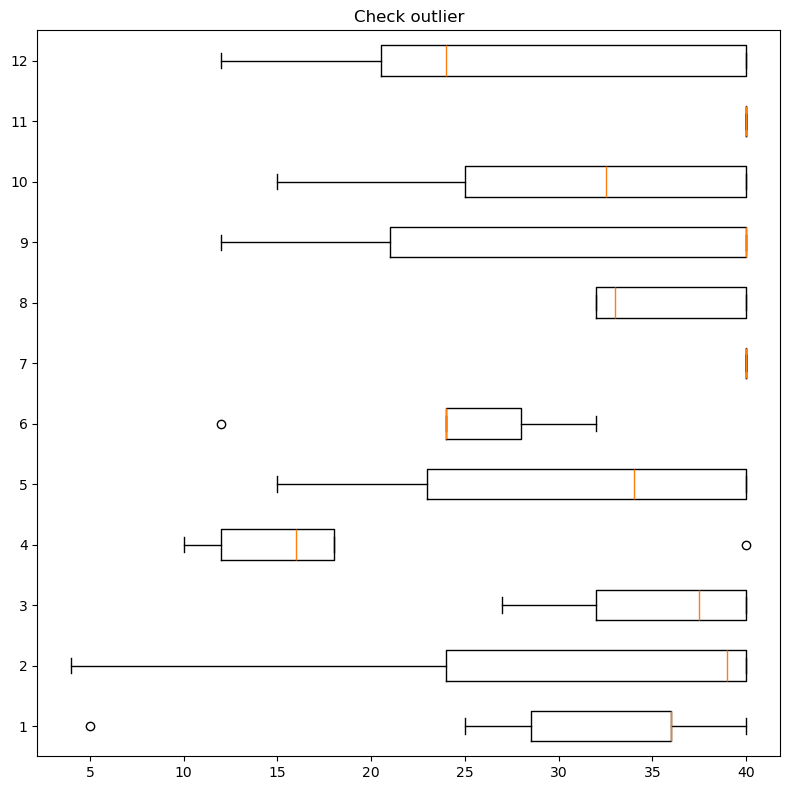

In [43]:
# boxplot으로 데이터 분포 확인하기
fig, ax = plt.subplots(figsize=(8, 8))

datas = []
for dong in dong_list:
    data = 행정동_상권.query(f'통합_행정동_명 == "{dong}"')['개수']
    datas.append(data)
    
ax.boxplot(datas, vert=False)

ax.set_title('Check outlier')

plt.tight_layout()
plt.show()

* 위의 describe()를 바탕으로 75%까지 확인해서 행정동별 상권 대표 특성 파악하기
* boxplot을 확인해 이상치 확인함
    * 개포동 / 도곡동 / 세곡동 빼고는 결측치 없음.
* 분류를 자세하게 해야 좋을 것 같긴한데.. 일단 수치상으로 확인하고 대표 특성 적어놓음.

* 개포동 : 교육
* 논현동 : 교통
* 대치동 : 교통 / 교육
* 도곡동 : 교통 / 교육
* 삼성동 : 교통
* 세곡동 : 주거
* 수서동 : 교통
* 신사동 : 상업 / 주거
* 압구정동 : 상업
* 역삼동 : 상업 / 교통
* 일원1동 : 교육
* 청담동 : 상업

In [44]:
dong = dong_list[0]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 개포동 : 교육

,통합_행정동_명,상권_코드_명,개수
0,개포동,강남개포시장,40
1,개포동,개포고등학교,36
4,개포동,국악고교사거리,36
6,개포동,포이초등학교(개포목련어린이공원),36
3,개포동,국립국악고등학교,32
2,개포동,개포지구대옆,25
5,개포동,논현로18길,5


In [45]:
dong = dong_list[1]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 논현동 : 교통

,통합_행정동_명,상권_코드_명,개수
7,논현동,강남구청역,40
14,논현동,논현초등학교,40
22,논현동,학동역,40
19,논현동,언주역(차병원),40
18,논현동,언주역 3번,40
16,논현동,신논현역,40
15,논현동,서울세관,40
11,논현동,논현역,40
20,논현동,영동전통시장,39
9,논현동,논현2동주민센터,36


In [46]:
dong = dong_list[2]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 대치동 : 교통 / 교육

,통합_행정동_명,상권_코드_명,개수
29,대치동,도성초등학교,40
30,대치동,삼성역,40
31,대치동,선릉역,40
32,대치동,은마아파트,40
34,대치동,한티역,40
27,대치동,대치역,38
26,대치동,대치사거리,37
28,대치동,도곡초등학교,36
24,대치동,대치2동주민센터,32
25,대치동,대치동아우편취급국,32


In [47]:
dong = dong_list[3]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 도곡동 : 교통 / 교육

,통합_행정동_명,상권_코드_명,개수
37,도곡동,매봉역,40
40,도곡동,은광여고,18
38,도곡동,매봉역 1번,16
39,도곡동,싸리고개근린공원,12
36,도곡동,도곡2동주민센터(대치중학교),10


In [48]:
dong = dong_list[4]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 삼성동 : 교통 

,통합_행정동_명,상권_코드_명,개수
43,삼성동,봉은사역,40
45,삼성동,삼성중앙역,40
48,삼성동,선정릉역,40
52,삼성동,포스코사거리,40
41,삼성동,강남 마이스 관광특구,36
44,삼성동,봉은사역 4번,36
51,삼성동,코엑스,32
47,삼성동,삼성중앙역 7번,27
50,삼성동,청담역 3번,24
46,삼성동,삼성중앙역 5번,20


In [49]:
dong = dong_list[5]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 새곡동 : 주거

,통합_행정동_명,상권_코드_명,개수
55,세곡동,윗방죽마을공원,32
54,세곡동,아래방죽마을공원(율현초등학교),28
53,세곡동,대왕초등학교(세곡동사거리서남측),24
56,세곡동,은곡마을(은곡마을공원),24
57,세곡동,한국교통안전공단 강남자동차검사소,12


In [50]:
dong = dong_list[6]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 수서동 : 교통

,통합_행정동_명,상권_코드_명,개수
58,수서동,수서역,40


In [51]:
dong = dong_list[7]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 신사동 : 상업 / 주거

,통합_행정동_명,상권_코드_명,개수
59,신사동,가로수길,40
62,신사동,압구정역,40
63,신사동,한남IC,33
60,신사동,강남시장(강남구 강남시장),32
61,신사동,신사은행나무공원,32


In [52]:
dong = dong_list[8]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 압구정동 : 상업

,통합_행정동_명,상권_코드_명,개수
64,압구정동,강남을지병원,40
65,압구정동,도산공원교차로,40
67,압구정동,성수대교남단,40
70,압구정동,압구정로데오역(압구정로데오),40
66,압구정동,도산공원북측,25
68,압구정동,신구중학교,17
69,압구정동,신사상가,12


In [53]:
dong = dong_list[9]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 역삼동 : 상업 / 교통

,통합_행정동_명,상권_코드_명,개수
80,역삼동,뱅뱅사거리,40
73,역삼동,개나리아파트,40
74,역삼동,경복아파트교차로,40
75,역삼동,구역삼세무서,40
77,역삼동,도곡1동,40
79,역삼동,르네상스호텔사거리,40
85,역삼동,역삼역,40
72,역삼동,강남언주로,36
83,역삼동,언주역 6번,33
87,역삼동,역삼역 8번,32


In [54]:
dong = dong_list[10]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 일원1동 : 교육

,통합_행정동_명,상권_코드_명,개수
89,일원1동,대청초등학교,40


In [55]:
dong = dong_list[11]
행정동_상권.query(f'통합_행정동_명 == "{dong}"').sort_values(by='개수', ascending=False)
## 청담동 : 상업

,통합_행정동_명,상권_코드_명,개수
90,청담동,"강남구청(청담역_8번, 강남세무서)",40
92,청담동,경기고교사거리(경기고교앞사거리),40
97,청담동,청담사거리(청담동명품거리),40
101,청담동,학동사거리,40
95,청담동,영동대교남단교차로,38
93,청담동,언북초등학교,24
94,청담동,영동대교남단,24
100,청담동,청담초등학교,24
91,청담동,강남구청역 4번,22
99,청담동,청담역 12번,16


# 변수별 관계 확인

## 점포_상권_행정동

In [56]:
# 행정동별 점포수 확인


In [57]:
# 행정동별 서비스 업종별 점포수 확인


In [58]:
# 분기별 행정동별 점포수 확인


In [59]:
# 분기별 서비스 업종별 점포수 확인


In [60]:
# 분기별 개업, 폐업수 확인


In [61]:
# 행정동별 개업, 폐업수 확인


In [62]:
# 서비스별 개업, 폐업수 확인


In [63]:
# 분기별 행정동별 개, 폐업수 확인


In [64]:
# 분기별 서비스별 개, 폐업수 확인


In [65]:
# 행정동별 서비스별 개, 폐업수 확인

## 점포_행정동